In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv
from scipy.misc import imread, imsave, imresize 
%matplotlib inline
import imageio
import numpy as np
from scipy import ndimage as ndi

In [4]:
def plotColour(image):
    hsv_img = rgb2hsv(image)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    sat_img = hsv_img[:,:,1]

    from skimage import exposure
    plt.subplots(2,3,figsize=(14,10))
    plt.axis('off')
    plt.subplot(2,3,1)
    plt.imshow(exposure.equalize_hist(hue_img), cmap='gray')
    plt.title("Hue")

    plt.subplot(2,3,2)
    plt.imshow(exposure.equalize_hist(sat_img),cmap='gray')
    plt.title("Sat")

    
    plt.subplot(2,3,3)
    plt.imshow(image)
    plt.title("Image")

    plt.subplot(2,3,4)
    plt.imshow(image[:,:,0],cmap='gray')
    plt.title("Red")
    
    plt.subplot(2,3,5)
    plt.imshow(image[:,:,1],cmap='gray')
    plt.title("Green")
    
    plt.subplot(2,3,6)
    plt.title("Blue")
    plt.imshow(image[:,:,2],cmap='gray')

In [5]:
def diseaseClass(hue_img):
    hueI = hue_img
    from scipy.cluster import vq
    wHue= vq.whiten(hueI.flatten())

    centroid, label = vq.kmeans2(wHue,2)
    kMeanOut = label.reshape(256,256)

    from scipy import ndimage as ndi
    medFilterThre2= ndi.median_filter(kMeanOut, size = 3)

    #check if leaf is true or false, swtich to to T if F
    if medFilterThre2[128,128] ==0:
        print("leaf is false")
        medFilterThre2[medFilterThre2 == 0] = 2
        finalC= medFilterThre2 -1
        print(finalC.shape, finalC[128,128])
    else:
        finalC = medFilterThre2
    
    #reduce small pixel blocks

    label_objects, nb_labels = ndi.label(finalC)
    sizes = np.bincount(label_objects.ravel())
    mask_sizes = sizes > 200
    mask_sizes[0] = 0
    medFilterThre2C = mask_sizes[label_objects]

    forFinal = ndi.morphology.binary_fill_holes(medFilterThre2C)
    forFinal = ndi.morphology.binary_erosion(forFinal, iterations =2)
    
    return forFinal




/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/scipy/cluster/vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "
/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


leaf is false
(256, 256) 1
leaf is false
(256, 256) 1
leaf is false
(256, 256) 1
leaf is false
(256, 256) 1
leaf is false
(256, 256) 1
leaf is false
(256, 256) 1


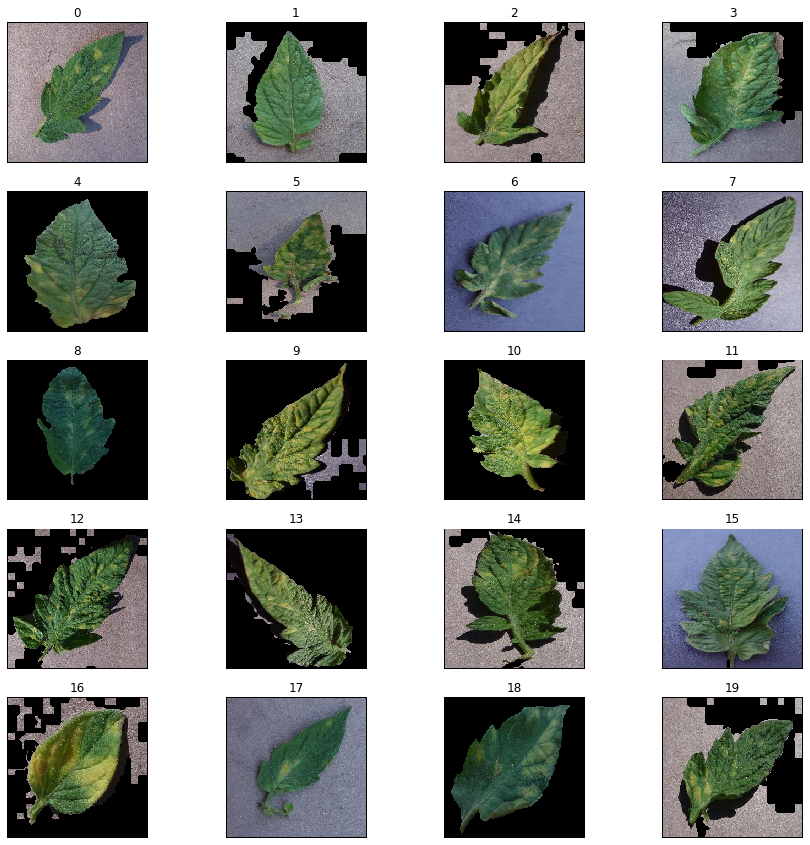

In [6]:
#test batch #1
import os

fileFolder = "/Users/boshan/Documents/School/MacineLearning/Project/ProjectLocal/Disease"
fileList = os.listdir(fileFolder)

plt.subplots(5,4,figsize=(15,15))
for item in fileList:
    if os.path.splitext(item)[-1].upper() != ".JPG":
        fileList.remove(item)

# show the first 20 
for i in range(20):
    inputImage=os.path.join(fileFolder,fileList[i])
    #print(inputImage)
    img = imageio.imread(inputImage)
    hsv_img = rgb2hsv(img)
    hue_img = hsv_img[:,:,0]

    mask = diseaseClass(hue_img)

    if mask is None:
        plt.subplot(5,4,i+1)
        #print(inputImage)
        n, bins, patches = plt.hist(hue_img.ravel(), bins=5)
        #plt.imshow(hsv_img, cmap = "gray")
        #plt.imshow(img)
        
        plt.title(i)
        plt.axis('off')
        
        print(i)
        print(n)
        print(bins)
        print(np.gradient(n))
        print("******")

        
    else:
        finalImage = np.zeros((img.shape))
        for j in range(3):
            finalImage[:,:,j]= img[:,:,j]* mask

        plt.subplot(5,4,i+1)
        plt.imshow(finalImage.astype(int))
        plt.title(i)
        plt.axis('off')

#plt.savefig('summarySat.png')

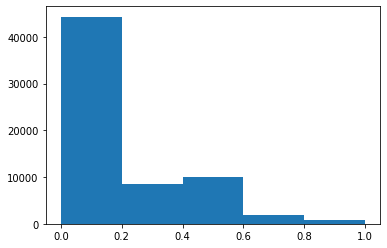

In [20]:
a = os.path.join(fileFolder,fileList[8])

test = imageio.imread(a)
hsv_img = rgb2hsv(img)
hue_img = hsv_img[:,:,1]
hueI = n, bins, patches = plt.hist(hue_img.ravel(), bins=5)

#(test)
